## Enosmerne poti

Prometni strokovnjaki, zaposleni na Oddelku za motorni promet in gospodarske dejavnosti MOL, so sestavili študijo, ki je pokazala, da bi bilo za prometno varnost kolesarjev najboljše, če bi bile kolesarske steze le na eni strani ceste. (Obenem bi na drugi strani ceste pridobili prostor za širitev ceste za en pas.) Nadalje so prometni strokovnjaki ugotovili, da bi bile takšne kolesarske steze potem preozke za dvosmerni promet, zato so se odločili, da bodo povezave med križišči enosmerne. Situacija je prikazana na sliki.

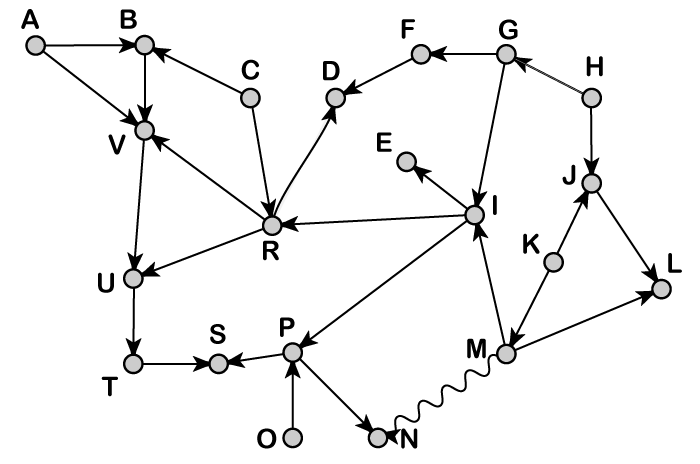

Na ugovore kolesarjev, da bodo nekatera križišča zato postala nedosegljiva ali pa se spremenila v slepo ulico (npr. E in S), je MOL odgovoril: "*Vaši pomisleki so popolnoma neutemeljeni. Kot je razvidno iz slike, so naši prometni strokovnjaki sestavili zemljevid tako, da se kolesar ne more ujeti v cikel, torej, nobena pot ga ne more pripeljati v križišče, v katerem je že bil. Takšna ureditev je inovacija v svetovnem merilu, na katero smo še posebej ponosni.*" (Ta odgovor je dejansko pomemben za vaše reševanje naloge!)

Zemljevid je podan v obliki

```python
poti = {
   A: {B: {"gravel", "trava"}, V: {"pesci", "lonci"}},
   B: {V: set()},
   C: {B: {"bolt", "lonci"}, R: {"stopnice", "pesci", "lonci"}},
   D: {},
   E: {},
   F: {D: {"stopnice", "pesci"}},
   ...
```

Ključi so vsa križišča. Pripadajoče vrednosti so slovarji, kateri ključi so sosednja vozlišča, pripadajoče vrednosti pa veščine, potrebne na poti. Vaše naloge veščine ne zadevajo, zato jih ignorirajte. (Tu so na zalogo, za prihodnje naloge. :)

### Obvezna naloga

- Napišite funkcijo `obstaja_pot(od, do)`, ki vrne `True`, če je iz križišča `od` možno priti do križišča `do`, in `False`, če ni. (`True` vrne tudi, če sta `od` in `do` pravzaprav isto križišče.)

- Napišite funkcijo `dosegljive(od)`, ki vrne množico vseh križišč, ki so dosegljiva iz podanega križišča (vključno s tem križiščem). Klic `dosegljiva("O")` vrne `{"O", "S", "P", "N"}`.

#### Rešitev

Funkcija `obstaja_pot` je precej podobna nalogi z vaj, v kateri nas je zanimalo, ali v rodbini neke osebe obstaja oseba z določenim imenom.

Pot obstaja, če je `od` pravzaprav enako `do` in smo torej že tam, ali za neko križišče, v katerega lahko pridemo iz `od` velja, da iz tega križišča obstaja pot do `do`. Če ne, pa poti ni.

In [1]:
def obstaja_pot(od, do):
    if od == do:
        return True
    for vmesno in poti[od]:
        if obstaja_pot(vmesno, do):
            return True
    return False

Krajše pa tako.

In [3]:
def obstaja_pot(od, do):
    return od == do or any(obstaja_pot(x, do) for x in poti[od])

Iz `od` je dosegljiv `od`, poleg tega pa vsi, ki so dosegljivi iz točk, ki so dosegljive iz `od`.

In [5]:
def dosegljive(od):
    doseg = {od}
    for vmesna in poti[od]:
        doseg |= dosegljive(x)
    return doseg

#### Bolj zapletena rešite

Tole čisto presega snov, vendar je nekatere (točneje: nekoga) zanimala še rešitev z generatorjem, zato poglejmo.

Spodnje ne deluje.

In [6]:
def dosegljive(od):
    return {od} | {dosegljive(vmesna) for vmesna in poti[od]}

Problem je v `{dosegljive(vmesna) for vmesna in poti[od]}`. V množico poskušamo zložiti vse, kar vrača funkcija `dosegljive`. Funkcija `dosegljive` vrača množice, torej poskušamo sestaviti množico množic. To pa (a) ne gre in (b) ni tisto, kar potrebujemo. Python bo javil napako, da `set` ni `hashable`.

Hočemo unijo vsega, kar vrne `dosegljive`. Unijo množic sicer računamo z operatorjem `|`, poleg tega pa obstaja tudi metoda `union`, ki dela približno isto.

In [11]:
a = {1, 2, 3}
b = {3, 4, 5}
c = {10, 11, 12}
d = {3, 11, 15}

In [12]:
a | b

{1, 2, 3, 4, 5}

In [13]:
a.union(b)

{1, 2, 3, 4, 5}

Razlika je v tem, da `union` sprejme več argumentov. Izračuna bo unijo vseh.

In [14]:
a.union(b, c, d)

{1, 2, 3, 4, 5, 10, 11, 12, 15}

Kaj pa, če bi bile množice `b`, `c` in `d` shranjene v seznamu?

In [15]:
s = [b, c, d]

In [17]:
a.union(s)

TypeError: unhashable type: 'set'

No, da. To spet ne gre: to bi izračunalo unijo elementov `a`-ja in `s`-ja, elementi s-ja pa so množice in dobili bi množico množic. Če pred `s` dodamo zvezdico, pa to pomeni, naj bodo elementi `s`-ja argumenti funkcije.

In [18]:
a.union(*s)

{1, 2, 3, 4, 5, 10, 11, 12, 15}

`a.union(*s)` je isto kot `a.union(s[0], s[1], s[2])` (če ima `s` tri elemente; če jih je vač ali manj, potem gremo pač do več ali manj kot `2`).

`s` seveda ni nujno seznam. Lahko je tudi terka ali množica ali slovar ali ... generator. Rešitev naloge je potem:

In [19]:
def dosegljive(od):
    return {od}.union(*(dosegljive(vmesna) for vmesna in poti[od]))

Na predavanjih sem sicer pokazal nekaj malenkost nerodnejšega: napisal sem

In [20]:
def dosegljive(od):
    return {od} | set().union(*(dosegljive(vmesna) for vmesna in poti[od]))

Namesto da bi dodal vse posredno dosegljive točke k množici `{od}`, sem vzelo prazno množico, `set()`, vanjo pounijal vse množice in to dodal k `{od}`. To je seveda nerodnejše, vendar kažem zato, ker vam lahko pride prav kdaj drugič.

### Dodatna naloga

- Napišite funkcijo `dolzina_poti(od, do)`, ki vrne dolžino najkrajše poti (v smislu števila povezav) med podanima točkama. Če sta `od` in `do` isto križišče, vrne `0`. Klic `dolzina_poti("I", "S")` vrne `2`. (Med I in S obstaja tudi daljša pot, I-R-U-T-S, vendar mora funkcija vrniti dolžino najkrajše poti).

  Če pot med točkama ni možna, vrne `99`.

- Napišite funkcijo `najkrajsa_pot(od, do)`, ki vrne niz z najkrajšo potjo med podanima točkama. Če sta `od` in `do` isto križišče, vrne `od` (ali `do` :). Klic `najkrajsa_pot("G", "S")` vrne `"GIPS"`. (Med G in S obstaja tudi daljša pot, `"GIRUTS"`, vendar mora funkcija vrniti dolžino najkrajše poti). Če je najkrajših poti več, lahko vrne poljubno med njimi,

  Če pot med točkama ni možna, vrne `None`.

Po želji lahko napišete le eno od teh dveh funkcij, druga funkcija pa kliče to funkcijo. Ali pa uporabljata ena drugo na kak drug način. Zavoljo poučnosti pa predlagam, da napišete vsako funkcijo neodvisno od druge.

#### Rešitev

In [21]:
def dolzina_poti(od, do):
    if od == do:
        return 0
    naj = 98
    for x in poti[od]:
        dolz = dolzina_poti(x, do)
        if dolz < naj:
            naj = dolz
    return naj + 1


def najkrajsa_pot(od, do):
    if od == do:
        return od
    naj = None
    for x in poti[od]:
        pot = najkrajsa_pot(x, do)
        if pot is not None and (naj is None or len(pot) < len(naj)):
            naj = pot
    return naj and od + naj